In [3]:
pip install numpy pandas matplotlib seaborn scikit-learn yfinance

  Obtaining dependency information for yfinance from https://files.pythonhosted.org/packages/b2/38/7533745b517c34b7b749a7a21f631711354a3d4d39a840d75d20c94d71a0/yfinance-0.2.51-py2.py3-none-any.whl.metadata
  Using cached yfinance-0.2.51-py2.py3-none-any.whl.metadata (5.5 kB)
  Obtaining dependency information for frozendict>=2.3.4 from https://files.pythonhosted.org/packages/04/13/d9839089b900fa7b479cce495d62110cddc4bd5630a04d8469916c0e79c5/frozendict-2.4.6-py311-none-any.whl.metadata
  Using cached frozendict-2.4.6-py311-none-any.whl.metadata (23 kB)
  Obtaining dependency information for html5lib>=1.1 from https://files.pythonhosted.org/packages/6c/dd/a834df6482147d48e225a49515aabc28974ad5a4ca3215c18a882565b028/html5lib-1.1-py2.py3-none-any.whl.metadata
  Using cached html5lib-1.1-py2.py3-none-any.whl.metadata (16 kB)
Using cached yfinance-0.2.51-py2.py3-none-any.whl (104 kB)
Using cached frozendict-2.4.6-py311-none-any.whl (16 kB)
Using cached html5lib-1.1-py2.py3-none-any.whl (112 

[*********************100%***********************]  1 of 1 completed


Price           Close       High        Low       Open     Volume
Ticker           AAPL       AAPL       AAPL       AAPL       AAPL
Date                                                             
2020-01-02  72.796013  72.856606  71.545380  71.799866  135480400
2020-01-03  72.088287  72.851753  71.862884  72.020424  146322800
2020-01-06  72.662712  72.701492  70.954002  71.206070  118387200
2020-01-07  72.320992  72.929337  72.100433  72.672425  108872000
2020-01-08  73.484352  73.787315  72.022858  72.022858  132079200
Mean Squared Error: 4.429039538062345


<function matplotlib.pyplot.xlabel(xlabel: 'str', fontdict: 'dict[str, Any] | None' = None, labelpad: 'float | None' = None, *, loc: "Literal['left', 'center', 'right'] | None" = None, **kwargs) -> 'Text'>

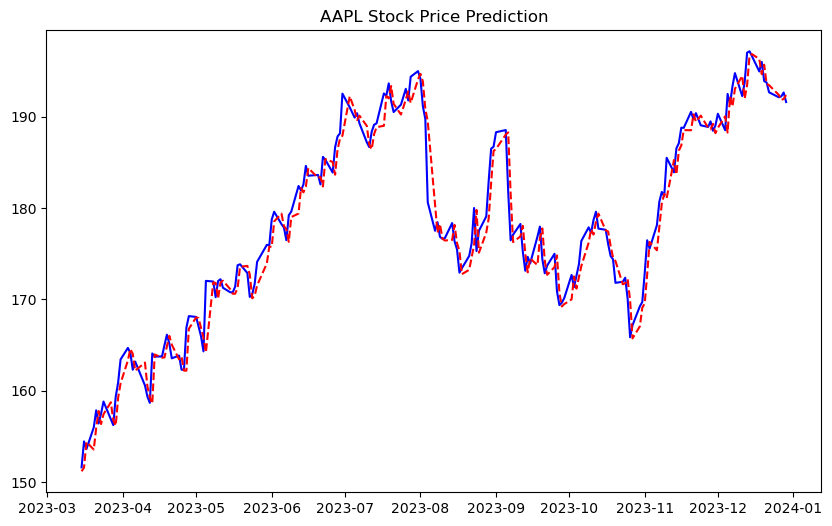

In [23]:
# Importing required libraries
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Fetching the stock data (e.g., Apple stock data)
stock_symbol = 'AAPL'  # You can change this to any stock symbol like 'GOOG', 'AMZN', etc.
start_date = '2020-01-01'
end_date = '2024-01-01'

# Download stock data
data = yf.download(stock_symbol, start=start_date, end=end_date)

# Display the first few rows of the data
print(data.head())

# Prepare the features and target variable
# We will use the previous day's 'Close' price to predict the next day's 'Close' price
data['Prev Close'] = data['Close'].shift(1)
data = data.dropna()  # Dropping the rows with NaN values

# Features (X) and Target variable (y)
X = data[['Prev Close']]  # Predicting 'Close' based on 'Prev Close'
y = data['Close']

# Splitting the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Creating and training the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Calculating Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# Visualizing the predicted vs actual stock prices
plt.figure(figsize=(10,6))
plt.plot(y_test.index, y_test, label='Actual Prices', color='blue')
plt.plot(y_test.index, y_pred, label='Predicted Prices', color='red', linestyle='--')
plt.title(f'{stock_symbol} Stock Price Prediction')
plt.xlabel
